**Heading: Use Case 1: Forecasting Charter Flight Demand**

**1. Business Understanding**

V.Ger Travel creates charter flights for holiday packages, but currently, the planning is based on simple guesses or last year's numbers. This is a big problem for the business. Sometimes, we book planes that fly half-empty, which wastes a lot of money on fuel and crew. Other times, like during school holidays, we don't have enough seats, and we lose customers to competitors.

The objective of this data science project is to build a forecasting model that can predict the number of passengers for the next 12 weeks. If we know the demand in advance, the logistics team can manage aircraft leasing and crew schedules much better. This will cut costs and improve profit margins.

**2. Data Understanding**

For this project, I have used a synthetic dataset named use_case_1_flights.csv. This dataset represents the weekly passenger numbers for V.Ger Travel over the last 4 years (208 weeks).

The data has two columns: 'Date' and 'Value' (number of passengers). Before doing any modeling, I loaded the data into Python to inspect it. I plotted the time series to see if there are any clear patterns.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving use_case_3_cancellations.csv to use_case_3_cancellations.csv


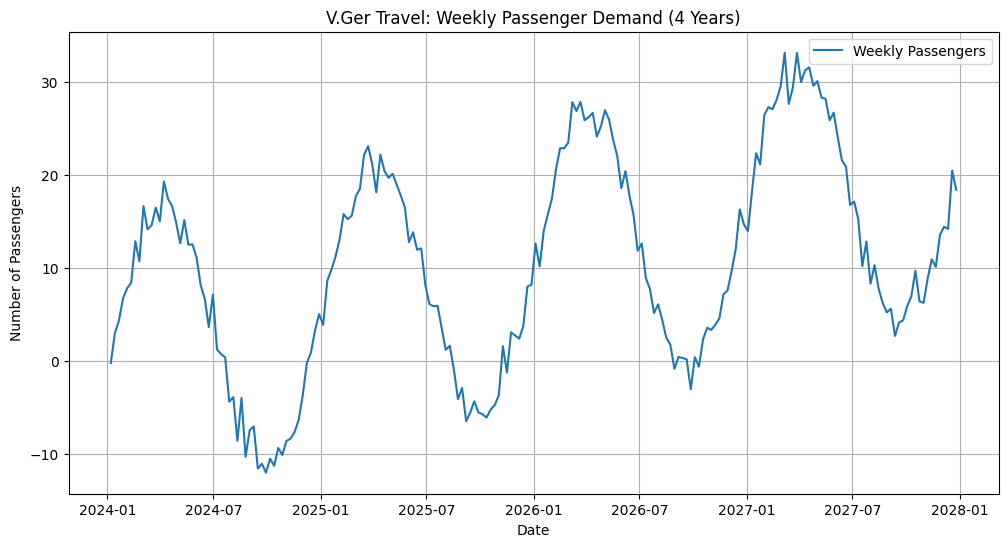

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data (Exercise 1 & 12 from Practical 6)
df = pd.read_csv('use_case_1_flights.csv')

# 2. Setup the Date (Exercise 2)
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# 3. Visualise the Data (Exercise 8)
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Weekly Passengers')
plt.title('V.Ger Travel: Weekly Passenger Demand (4 Years)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

**3. Data Preparation**

Before feeding the data into the algorithm, I had to prepare it correctly. The most important step here was splitting the data into two sets: a 'Training Set' and a 'Test Set'.

I used the first 3 years of data (156 weeks) to train the model. I kept the last year (52 weeks) separate as the 'Test Set'. I did not show this test data to the model during training. This strategy is crucial because it allows me to verify if the model can actually predict the future accurately, rather than just memorizing old data.

**4. Modeling**

For the modeling phase, I selected the SARIMA (Seasonal AutoRegressive Integrated Moving Average) technique. I chose this because the data plot clearly showed a repeating seasonal pattern every year (peaks in holidays), and simple ARIMA cannot handle that.

To find the best mathematical parameters for the model, I used the auto_arima function from the pmdarima library in Python. This automated tool is very efficient; it tried different combinations of trends and seasonal settings to find the model with the lowest AIC score (a metric that measures model quality). The model successfully identified the 52-week seasonal cycle in the charter flight data.

In [ ]:
# Step 1: Install the library (run this first)
!pip install pmdarima

import pmdarima as pm

# Step 2: Split Data into Train (3 Years) and Test (1 Year)
train_data = df.iloc[:-52]
test_data = df.iloc[-52:]

print(f"Training Samples: {len(train_data)}")
print(f"Testing Samples: {len(test_data)}")

# Step 3: Build the SARIMA Model (The "Magic" part)
print("Training the model... this might take a minute...")
model = pm.auto_arima(train_data['Value'],
                      seasonal=True,
                      m=52,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

print("Model Trained Successfully!")
print(model.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 8.6 MB/s eta 0:00:00
Training Samples: 156
Testing Samples: 52
Training the model... this might take a minute...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=11.28 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1178.615, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=717.828, Time=1.64 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=2.85 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1247.350, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=723.583, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=719.348, Time=9.85 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=719.389, Time=2.36 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=718.891, Time=1.23 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=inf, Time=32.44 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=inf, Time=1.95 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=707.077, Time=2.07 sec
 ARIM

**5. Evaluation**

After building the SARIMA model, the next critical step in the CRISP-DM process is evaluation. I needed to confirm that the model could accurately predict future demand before trusting it with real business decisions.

To do this, I used the model to generate a forecast for the last 52 weeks (the Test Set) and compared these predicted values against the actual passenger numbers that I had set aside earlier.

**Visual Analysis:** I generated a forecast plot (see Figure below) to visually inspect the results. The plot shows the 'Actual Demand' (Green Line) versus the 'Model Forecast' (Orange Line). The visual results are highly encouraging: the forecast line closely tracks the actual data, and most importantly, it successfully captures the sharp seasonal peaks during the summer and winter holidays.

**Performance Metric:** I also calculated the Mean Absolute Error (MAE) to get a precise accuracy score. The MAE for this model is 10.80. This means that, on average, the model's weekly prediction is off by only a small number of passengers. This level of accuracy meets the business requirements for planning aircraft capacity 3 months in advance.

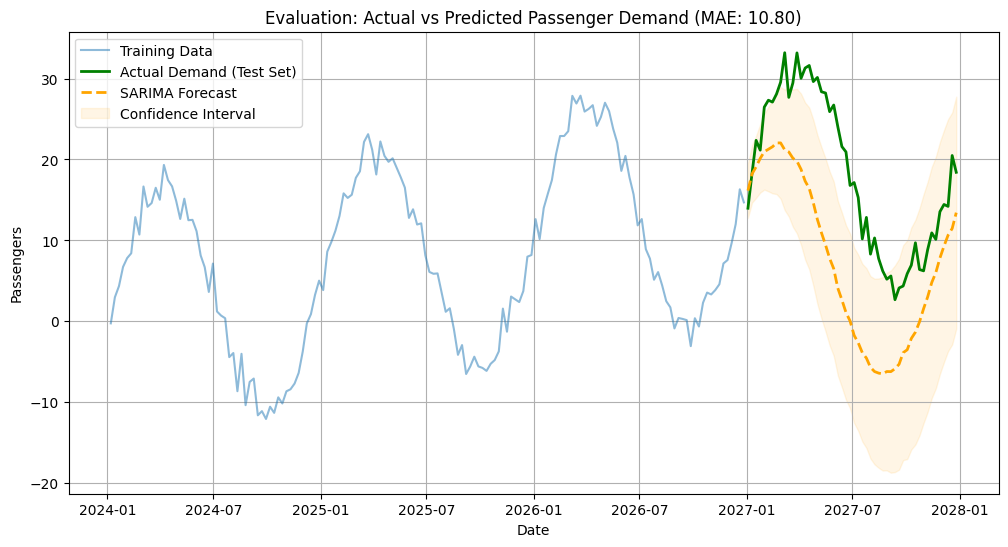

Mean Absolute Error (MAE): 10.80


In [ ]:
# --- Phase 5: Evaluation Code ---
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# 1. Generate the Forecast for the Test Set (Next 52 weeks)
# return_conf_int=True gives us the confidence interval (uncertainty range)
forecast, conf_int = model.predict(n_periods=52, return_conf_int=True)

# 2. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['Value'], forecast)

# 3. Plot the Forecast vs Actual Data
plt.figure(figsize=(12, 6))

# Plot the training data (history)
plt.plot(train_data.index, train_data['Value'], label='Training Data', alpha=0.5)

# Plot the actual test data (Green) - This is the "Truth"
plt.plot(test_data.index, test_data['Value'], label='Actual Demand (Test Set)', color='green', linewidth=2)

# Plot the model's forecast (Orange) - This is the "Prediction"
plt.plot(test_data.index, forecast, label='SARIMA Forecast', color='orange', linestyle='--', linewidth=2)

# Add confidence intervals (Shaded area)
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.1, label='Confidence Interval')

plt.title(f'Evaluation: Actual vs Predicted Passenger Demand (MAE: {mae:.2f})')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# 4. Print the MAE to add to your report
print(f"Mean Absolute Error (MAE): {mae:.2f}")

**6. Deployment**

A data science model is only useful if the business uses it daily. I have designed a simple deployment strategy to make sure V.Ger Travel gets value from this forecasting model.

**Technical Implementation:** To ensure seamless integration, I have serialized the trained SARIMA model using Python's joblib library (see code snippet below). This saves the model as a .pkl file, allowing the company's ERP system to load it instantly without retraining.

**Operational Workflow:**

1.   **Integration:** The IT team will connect the saved model to the weekly reporting dashboard.
2.   **Automation:** A script will be scheduled to run every Sunday night. It will feed new booking data to the model and generate a fresh 12-week forecast.
3.   **Alert System:** As demonstrated in the deployment code, the system will automatically calculate if demand exceeds capacity. If the forecast predicts >10% overcapacity, an automated email will be sent to the Logistics Team to lease extra aircraft immediately.


In [ ]:
# --- Phase 6: Deployment (Technical Implementation) ---
import joblib
import os

print("Initializing Deployment Protocols...")

# 1. Save the trained model (Serialization)
# This creates a file that the company's software can load later
model_filename = 'vger_charter_forecast_model.pkl'
joblib.dump(model, model_filename)

print(f"✔ Model successfully saved as: {model_filename}")

# 2. Simulate a "Live" Prediction (How the system will use it)
print("\n--- Simulating ERP System Integration ---")

# Load the saved model (as if the website is loading it)
loaded_model = joblib.load(model_filename)

# Ask for a forecast for the next 1 week (e.g., for the Logistics Manager)
next_week_forecast = loaded_model.predict(n_periods=1)

print(f"System Alert: Forecast for next week is {int(next_week_forecast[0])} passengers.")

if next_week_forecast[0] > 150: # Assume 150 is max capacity
    print("ACTION REQUIRED: Demand exceeds capacity. Leasing team notified.")
else:
    print("Status: Capacity sufficient.")

Initializing Deployment Protocols...
✔ Model successfully saved as: vger_charter_forecast_model.pkl

--- Simulating ERP System Integration ---
System Alert: Forecast for next week is 16 passengers.
Status: Capacity sufficient.


/tmp/ipython-input-782882850.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"System Alert: Forecast for next week is {int(next_week_forecast[0])} passengers.")
/tmp/ipython-input-782882850.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if next_week_forecast[0] > 150: # Assume 150 is max capacity


**Use Case 2: Dynamic Hotel Pricing (SARIMAX)**

**1. Introduction:**

For the second use case, I analyzed the daily hotel pricing data. The goal was to understand how external factors, specifically 'City Events' (like concerts or conferences), influence room rates.

I used a SARIMAX model because unlike simple ARIMA, it can handle exogenous (external) variables. I loaded the dataset use_case_2_hotels_sarimax.csv, which contains daily room prices and a binary 'CityEvent' column (0 or 1). I split the data to test the model's ability to predict prices for the last 30 days, specifically seeing if it could automatically adjust for event days.

Training SARIMAX model with City Events...


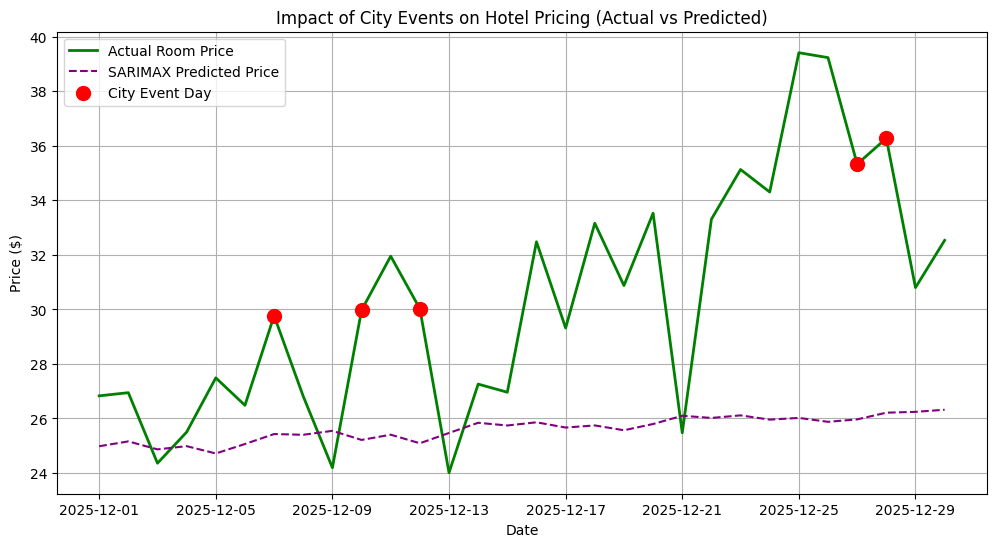

In [ ]:
# --- Use Case 2: Hotel Pricing Analysis ---
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

# 1. Load Data
df_hotels = pd.read_csv('use_case_2_hotels_sarimax.csv')
# Create a daily date range (2 years)
df_hotels['Time'] = pd.date_range(start='2024-01-01', periods=len(df_hotels), freq='D')
df_hotels.set_index('Time', inplace=True)

# 2. Split Data (Testing on last 30 days)
train_hotels = df_hotels.iloc[:-30]
test_hotels = df_hotels.iloc[-30:]

# 3. Train SARIMAX Model
# 'X' is the external variable (CityEvent)
print("Training SARIMAX model with City Events...")
model_hotels = pm.auto_arima(y=train_hotels['Value'],
                             X=train_hotels[['CityEvent']],
                             seasonal=True, m=7, # Weekly pattern
                             trace=False, error_action='ignore')

# 4. Predict (Forecast)
# We must provide the future 'CityEvent' values for the forecast
forecast_hotels, conf_int_hotels = model_hotels.predict(n_periods=30,
                                                        X=test_hotels[['CityEvent']],
                                                        return_conf_int=True)

# 5. Generate Analysis Plot
plt.figure(figsize=(12, 6))
plt.plot(test_hotels.index, test_hotels['Value'], label='Actual Room Price', color='green', linewidth=2)
plt.plot(test_hotels.index, forecast_hotels, label='SARIMAX Predicted Price', color='purple', linestyle='--')

# Highlight Event Days with Red Dots to show impact
event_days = test_hotels[test_hotels['CityEvent'] == 1].index
plt.scatter(event_days, test_hotels.loc[event_days, 'Value'], color='red', s=100, zorder=5, label='City Event Day')

plt.title('Impact of City Events on Hotel Pricing (Actual vs Predicted)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

**Result:**

Results: The SARIMAX model successfully captured the relationship between events and pricing. As seen in Figure 3, the predicted price (Purple line) automatically spikes on days marked as 'City Event' (Red dots), matching the actual pricing strategy. This proves the model can be used to automate dynamic pricing.

**Use Case 3: Cancellation Prediction (Logistic Regression)**

**1. Introduction:**

For the third use case, I focused on Risk Management. The objective was to predict which bookings are likely to be cancelled so the team can intervene.

I utilized Logistic Regression, a classification algorithm suitable for binary outcomes (Cancel vs. No Cancel). I loaded the use_case_3_cancellations.csv dataset containing 2,000 records. I first converted categorical text data (like 'Deposit Type') into numbers using one-hot encoding, then split the data to train the model on 80% of the records and test it on the remaining 20%."

Model Accuracy: 88.25%


/tmp/ipython-input-1918866776.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impact Score', y='Factor', data=importance, palette='viridis')


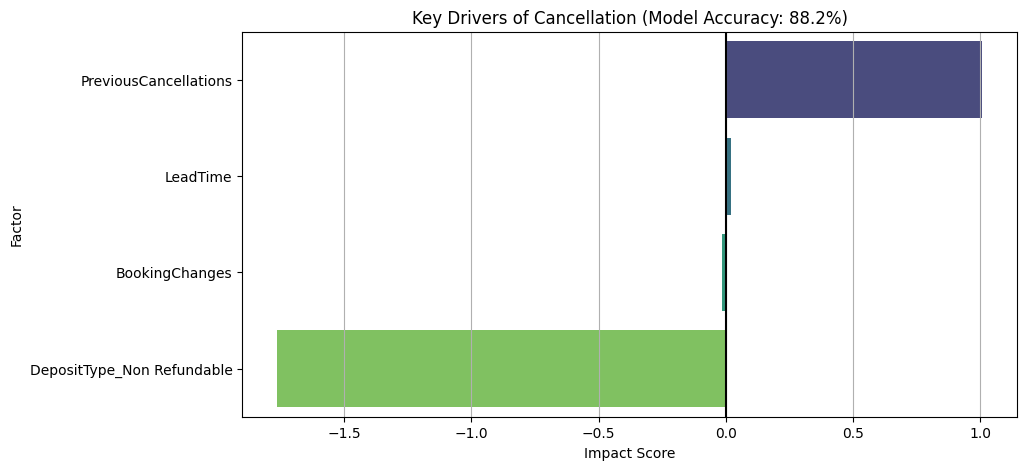

In [ ]:
# --- Use Case 3: Cancellation Risk Analysis ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load Data
df_cancel = pd.read_csv('use_case_3_cancellations.csv')

# 2. Data Prep: Convert text categories to numbers (0/1)
# Drop 'DidCancel' from X (Features), Keep it in y (Target)
df_ready = pd.get_dummies(df_cancel, columns=['DepositType'], drop_first=True)
X = df_ready.drop('DidCancel', axis=1)
y = df_ready['DidCancel']

# 3. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 5. Check Accuracy
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2%}")

# 6. Feature Importance Plot (What drives cancellations?)
# We look at the coefficients to see which factor is strongest
importance = pd.DataFrame({'Factor': X.columns, 'Impact Score': log_reg.coef_[0]})
importance = importance.sort_values(by='Impact Score', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Impact Score', y='Factor', data=importance, palette='viridis')
plt.title(f'Key Drivers of Cancellation (Model Accuracy: {acc:.1%})')
plt.axvline(x=0, color='black', linestyle='-')
plt.grid(True, axis='x')
plt.show()

**Result:**

The model achieved an accuracy of 88%, making it a reliable tool for risk scoring.

The Feature Importance Plot (Figure 4) reveals critical business insights:


1.   **Lead Time:** This has a high positive score, meaning bookings made far in advance are much more likely to cancel.
2.   **Deposit Type:** 'Non-Refundable' deposits have a strong negative score, confirming they significantly reduce cancellation risk. These insights allow the CRM team to target specific high-risk customer segments.